In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from hexagon_utilities import *
from colors import *
from plot_functions import *

import matplotlib.pyplot as plt

## `hex.line()`

In this short notebook, we look at the `hex.line` method. 
It is a multi-purpose method whose main purpose is to draw one line segment between two points inside or on the hexagon.
(In special cases, there can be multiple lines, or points can be outside the hexagon, but that is rare.)

We need to get hold of 2 endpoints (`start` and `end`). Once we have both of those, we can draw a line (and optionally arcs) 

Here are the various ways in which the `line()` method can be use.

1. From center to vertices (spokes) - One or all size spokes
2. From Center to EMP (edge mid points)
3. Center to Edge (edge = [0..5]). THe point can be random or specified distance from a vertex.

4. Vertex to Vertex

4. Edge to Vertex

4. Edge to Edge (say e1 to e4, start_pt_dist, end_pt_dist)
    Line random point on e1, and another on e4

5. From pt to edge, Angle is specified. (say from e3, at 30 degree to until another edge is met)

`stpt_name = ['center', 'edge', 'vertex', 'spoke', 'apotherm']`
`endpt_name = ['center', 'edge', 'vertex', 'spoke', 'apotherm']`


# Plot "Spokes: from Center to the Vertices

## `h.line(start_point='center', endpoint='vertex', dist=None, index=None)`

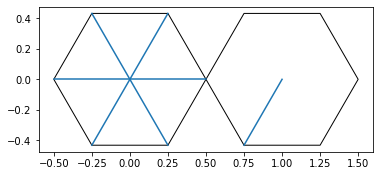

In [32]:
h = Hex(0, 0, size=0.5)
h.render(fc='none', color='k')
h.line(start_point='center', end_point='vertices')


h1 = Hex(1, 0, size=0.5)
h1.render(fc='none', color='k')
h1.line('center', 'v4', index=0)
    
    
plt.axis('scaled');

In [30]:
vs = []
vs.append(3)
vs

[3]

## h.point('vertices')

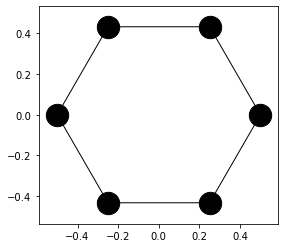

In [33]:
h = Hex(0, 0, size=0.5)
h.render(fc='none', color='k')
xys = h.point('vertices')
for p in xys:
    plt.scatter(*p, color='k', s=500)

plt.axis('scaled');

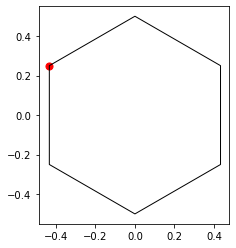

In [38]:
h = Hex(0, 0, size=0.5, flat=False)
h.render(fc='none', color='k')
xy = h.point('vertices', index=3) # index=3 says get me just the 3rd vertex
plt.scatter(*xy, color='r', s=50)

plt.axis('scaled');

Here are all the allowable pt_names:

## h.point('edge', action='trisect')

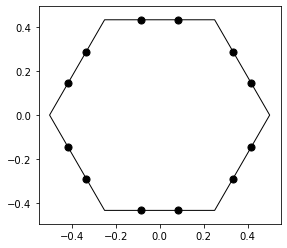

In [74]:
h = Hex(0, 0, size=0.5)
h.render(fc='none', color='k')
xys = h.point('edge', action='trisect', index=None) 
for p in xys:
    plt.scatter(*p, color='k', s=50)

plt.axis('scaled');

ALLOWABLE_POINT_NAMES = `['center', 'edge', 'vert', 'vertex', 'spoke']`



(4.45, 5.55, 3.5236860279185587, 4.476313972081441)

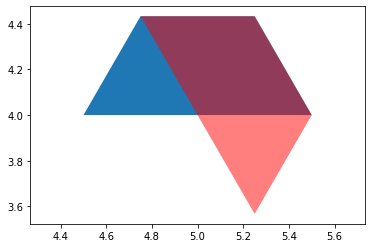

In [29]:
h.decorate(poly=HHEX0)
h.decorate(HHEX5, fc='red', alpha=0.5)
plt.axis('equal')

You can create a limitless number of patterns using just these Interior Polygons. 

(-1.1, 1.1, -0.9526279441628824, 0.9526279441628825)

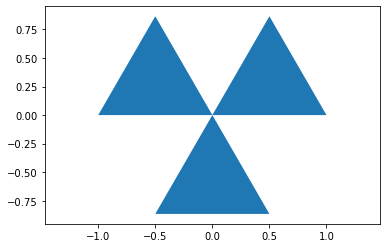

In [5]:
h.decorate(poly=CTRIANGLE0)
h.decorate(poly=CTRIANGLE4)
h.decorate(poly=CTRIANGLE2)

#h.decorate(HHEX5, fc='red')
plt.axis('equal')

`h.decorate(poly=NAMED_POLYGON, **kwargs)`

Any matplotlib keyword argument (kwargs) can be passed on to the `decorate` method. 
Things like alpha (transparency), edge_color, face_color and linewidth and several others.The full list of Keywords can be found at: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.patches.Polygon.html


(-0.8, 5.8, -0.6763139720814414, 4.6763139720814415)

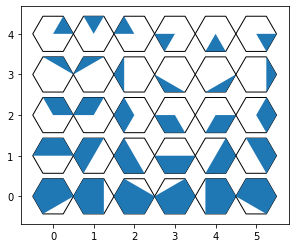

In [26]:
hhexs = [[PENTA0, PENTA1, PENTA2, PENTA3, PENTA4, PENTA5],
        [HHEX0, HHEX1, HHEX2, HHEX3, HHEX4, HHEX5],
         [RHOMBUS0, RHOMBUS1, RHOMBUS2, RHOMBUS3, RHOMBUS4, RHOMBUS5],
         [VTRIANGLE0, VTRIANGLE1, VTRIANGLE2, VTRIANGLE3, VTRIANGLE4, VTRIANGLE5,],
         [CTRIANGLE0, CTRIANGLE1, CTRIANGLE2, CTRIANGLE3, CTRIANGLE4, CTRIANGLE5,],
        ]
         
for y in range(5):
    include_center = False if (y==3 or y==0) else True
    for x in range(6):
        h = Hex(x, y, size=0.5)
        h.render(fc='none', color='k')
        h.decorate(hhexs[y][x], include_center=include_center)

plt.axis('scaled')